In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in data

df = pd.read_csv('/Users/ittaiweisman/Downloads/movies.csv.zip')

In [4]:
# Look at data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [6]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
# Based on our results, the only columns that are filled in for every movie are name, genre, year, and director.

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
# Change data types for columsn integers to get rid of '.0' at the end of each whole number

# The errors = 'coerce' parameter handles non-numeric values, fillna() replaces NaN values with zero, allowing
# astype() to convert the column to an integer.
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype('int64')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype('int64')


In [14]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                        NaN     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      NaN  
7666          0                        NaN    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [16]:
# Create correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime yearcorrect  
0      46998772               Warner Bros.    146.0        June  
1      58853106          Columbia Pictures    104.0        July  
2     538375067                  Lucasfilm    124.0        June  
3      83453539         Paramount Pictures     88.0        July  
4      39846344             Orion Pictures     98.0        July  
...         ...                        ...      ...         ...  
7663          0                        NaN     90.0        Octo  
7664          0  Cactus Blue Entertainment     90.0        Febr  
7665          0           Embi Productions      NaN        Apri  
7666          0                        NaN    120.0        Octo  
7667          0                PK 65 Films    102.0        Augu  

[7668 rows x 16 columns]

In [30]:
# Sort movies by gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [18]:
pd.set_option('display.max_rows', None)

In [20]:
# Drop any duplicates, showing all unique values 
df['company'].drop_duplicates().sort_values(ascending=False)


7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

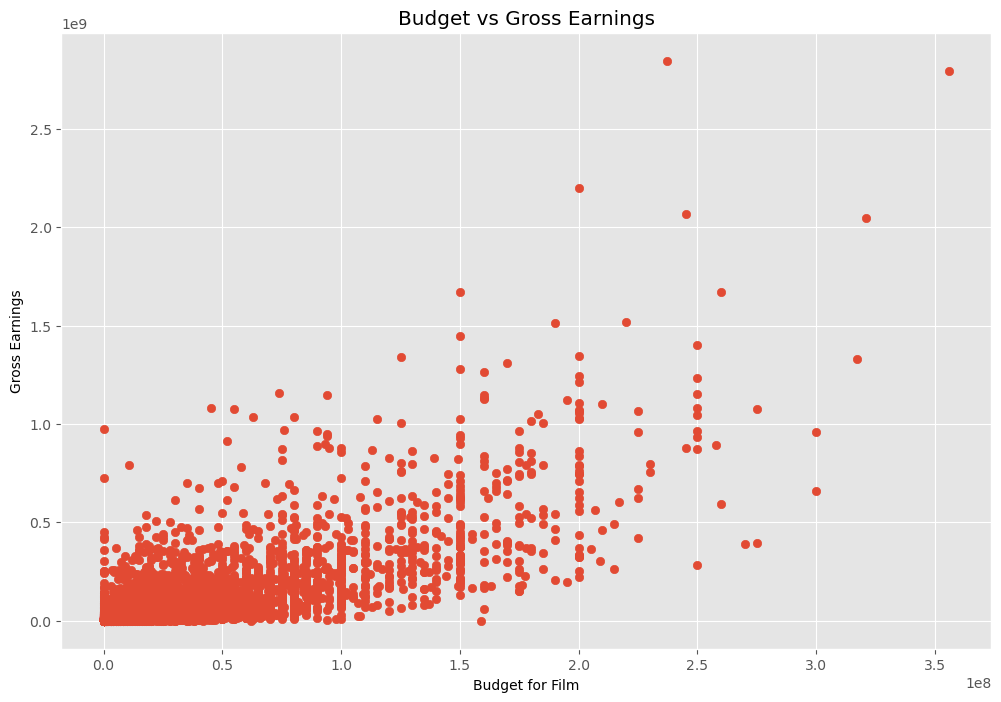

In [23]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

In [22]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

<Axes: xlabel='budget', ylabel='gross'>

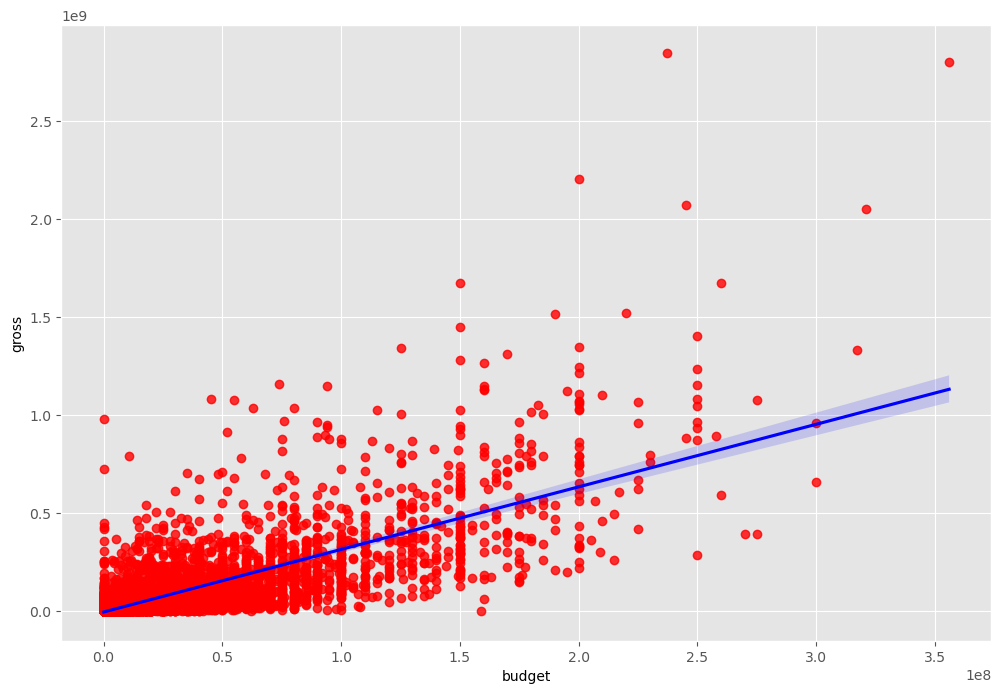

In [25]:
# Plot budget vs gross earnings using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [26]:
df.corr(method='pearson')

/var/folders/kl/2nsknytn5659yn_6bzhzmcqc0000gn/T/ipykernel_19507/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

/var/folders/kl/2nsknytn5659yn_6bzhzmcqc0000gn/T/ipykernel_19507/620583171.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


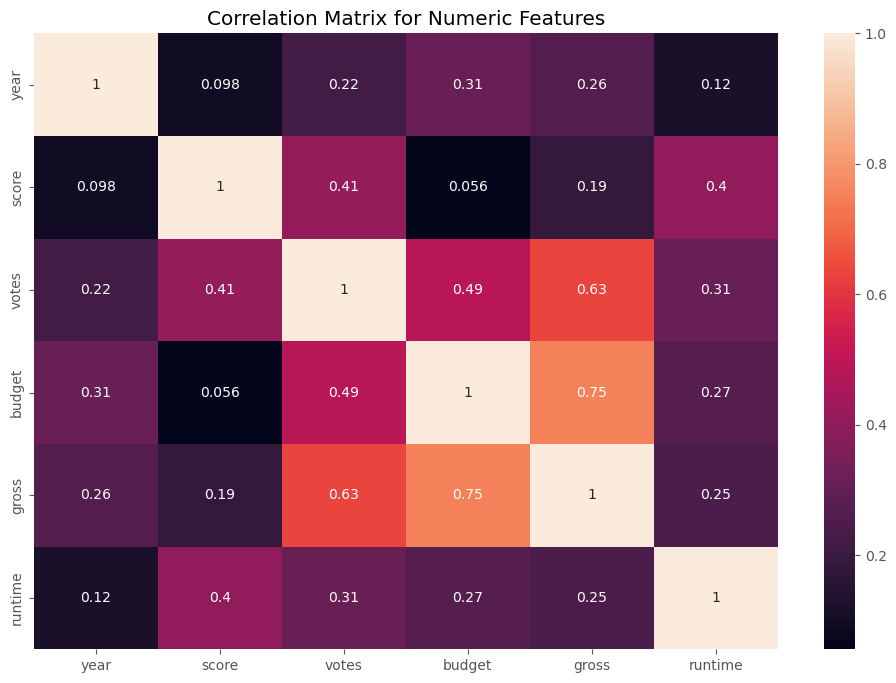

In [28]:
# Nifty way of presenting the correlation between columns

correlation_matrix = df.corr(method='pearson')

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [31]:
# Give every column a random numeric value so we can show correlation

df_numeric = df

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes # gives random "numeric value"
df_numeric

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      

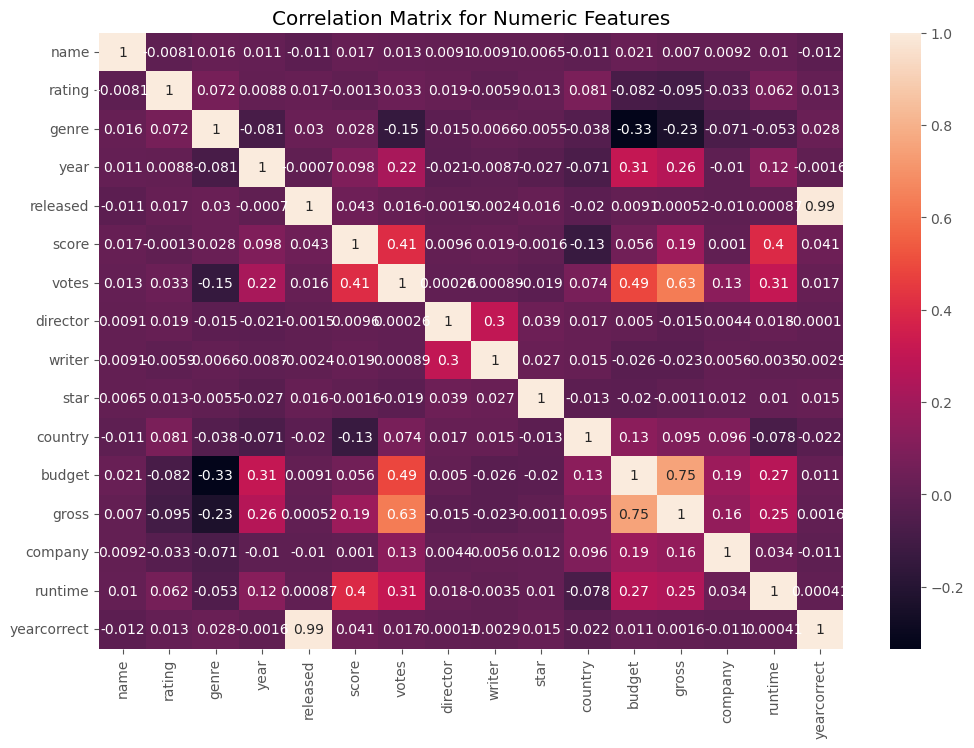

In [32]:
# New correlation matrix that includes all columns now that we have gave them all numeric values, allowing us
# to use them in the correlation matrix

correlation_matrix = df_numeric.corr(method='pearson')

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [35]:
correlation_mat = df_numeric.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect   -0.011725
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [36]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145307
votes        genre         -0.145307
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.095450
rating       gross         -0.095450
             budget        -0.081939
budget       rating        -0.081939
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
genre        country       -0.037615
country      genre         -0.037615
rating       company       -0.032943
company      rating        -0.032943
year         star          -0.027242
s

In [37]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.632834
gross        votes          0.632834
             budget         0.750157
budget       gross          0.750157
released     yearcorrect    0.993694
yearcorrect  released       0.993694
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have highest correlation to gross earnings
# Company has low correlation to gross earnings